In [1]:
import torchvision
from torchvision import transforms
import torch
import numpy as np
import pandas as pd
from torch import nn
import torch.nn.functional as F
import torchvision.models as models
import os
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from PIL import Image

from torch.utils.data import Dataset
from PIL import Image
import cv2

import matplotlib.pyplot as plt

In [ ]:
#model = models.resnet152(pretrained=True)
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/user/.torch/models/vgg16-397923af.pth
 43%|████▎     | 237297664/553433881 [09:00<1:08:58, 76388.77it/s]

In [4]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [5]:
#参数保存在有序的字典中，那么可以通过查找参数的名字对应的id值，进行冻结
model_dict = model.state_dict()
dict_name = list(model_dict)
for i, p in enumerate(dict_name):
    print(i, p)

0 conv1.weight
1 bn1.weight
2 bn1.bias
3 bn1.running_mean
4 bn1.running_var
5 bn1.num_batches_tracked
6 layer1.0.conv1.weight
7 layer1.0.bn1.weight
8 layer1.0.bn1.bias
9 layer1.0.bn1.running_mean
10 layer1.0.bn1.running_var
11 layer1.0.bn1.num_batches_tracked
12 layer1.0.conv2.weight
13 layer1.0.bn2.weight
14 layer1.0.bn2.bias
15 layer1.0.bn2.running_mean
16 layer1.0.bn2.running_var
17 layer1.0.bn2.num_batches_tracked
18 layer1.0.conv3.weight
19 layer1.0.bn3.weight
20 layer1.0.bn3.bias
21 layer1.0.bn3.running_mean
22 layer1.0.bn3.running_var
23 layer1.0.bn3.num_batches_tracked
24 layer1.0.downsample.0.weight
25 layer1.0.downsample.1.weight
26 layer1.0.downsample.1.bias
27 layer1.0.downsample.1.running_mean
28 layer1.0.downsample.1.running_var
29 layer1.0.downsample.1.num_batches_tracked
30 layer1.1.conv1.weight
31 layer1.1.bn1.weight
32 layer1.1.bn1.bias
33 layer1.1.bn1.running_mean
34 layer1.1.bn1.running_var
35 layer1.1.bn1.num_batches_tracked
36 layer1.1.conv2.weight
37 layer1.1.bn2

In [6]:
print(model.fc)

Linear(in_features=2048, out_features=1000, bias=True)


In [7]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 102)

In [8]:
model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [9]:
#读取当前的工作路径
path = os.getcwd()
path

In [11]:
picturepath = '/data1/IP102/Classification/Images'

In [12]:
#下面开始处理数据集
f = open('/data1/IP102/Classification/train.txt')
lines = f.readlines()
train_path = []
train_labels = []
for line in lines:
    train_path.append(line.split()[0])
    train_labels.append(line.split()[1])
    
#输出训练集的长度
print(len(train_path))



45095


In [13]:
#下面开始处理数据集
f = open('/data1/IP102/Classification/test.txt')
lines = f.readlines()
test_path = []
test_labels = []
for line in lines:
    test_path.append(line.split()[0])
    test_labels.append(line.split()[1])
    
#输出训练集的长度
print(len(test_path))


22619


In [14]:
#对原始图片的预处理
#from torchvision import transforms as transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.RandomRotation((-45,45)), #随机旋转
    transforms.ToTensor()
])

In [72]:
from torch.utils.data import Dataset
#定义一个数据集
class myDataset(Dataset):
    """ 数据集演示 """
    def __init__(self, path,labels):
        """实现初始化方法，在初始化的时候将数据读载入"""
        self.picturepath = '/data1/IP102/Classification/Images'
        self.train_path=path
        self.labels = labels  #注意这里得到的label是字符型的list 比如['1','3'],而不是[1,3]
        self.labels = list(map(int,labels))
    def __len__(self):
        '''
        返回df的长度
        '''
        return len(self.train_path)
    def __getitem__(self, idx):
        '''
        根据 idx 返回一行数据
        
        '''
        img = cv2.imread(self.picturepath+'/'+train_path[idx])
        img = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        #img = Image.open(self.picturepath+'/'+train_path[idx]).convert('RGB')
        label = self.labels[idx]
        #img_path = self.df.iloc[idx].insectdir
        #把图片做归一化处理
        img = transform(img)
        return img,label

#修改读取的文件的路径    
#ds_demo= myDataset('insect_dataread.csv')
train_data =  myDataset(train_path,train_labels)
test_data = myDataset(test_path,test_labels)
print(len(train_data))
print(len(test_data))

45095
22619


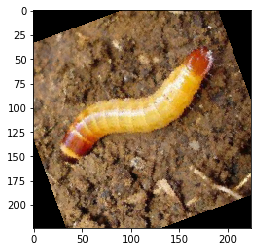

In [75]:
# 展示某张图：plt.imshow(ndarray)
#img = images[0]      # plt.imshow()只能接受3-D Tensor，所以也要用image[0]消去batch那一维
img = train_data[0][0].numpy()   # FloatTensor转为ndarray
img = np.transpose(img, (1,2,0))    # 把channel那一维放到最后

# 显示图片
plt.imshow(img)
plt.show()


In [76]:
train_ = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2)
test_ = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True, num_workers=2)


In [79]:
#loss function and optimizer
criterion=torch.nn.CrossEntropyLoss()
#parameters only train the last fc layer
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [80]:
train_loss = []
def trainmodel(model,train_loader,optimizer, epoch):
    model.train()
    for batch_idx, (inputs_, labels_) in enumerate(train_loader):        
        cuda = torch.device('cuda') 
        #直接用torch.tensor会有warning
        inputs = torch.tensor(inputs_).cuda()
        labels = torch.tensor(labels_).cuda()
        
        optimizer.zero_grad()
        output = model(inputs)
        
        #loss = F.nll_loss(output, target)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        if(batch_idx+1)%100 == 0: 
            train_loss.append(loss.item)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(inputs), len(train_loader)*len(inputs_),
                100. * batch_idx / len(train_loader), loss.item()))
            train_loss.append(loss.item)

In [81]:
accuracy = []
test_loss_return =[]
def testmodel(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            
            cuda = torch.device('cuda') 
            #这样有warning
            data = torch.tensor(inputs).cuda()
            target = torch.tensor(labels).cuda()
            #data = inputs.clone().detach().requires_grad_(True)
            #target = labels.clone().detach
            
            
            #device = torch.device("cuda")
            #data, target = data.to(device), target.to(device)
            #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            
            #data, target = data.to(device), target.to(device)
            #data, target = data.cpu(), target.cpu()
            
            output = model(data)
            test_loss += criterion(output, target).item() # 将一批的损失相加
            pred = output.max(1, keepdim=True)[1] # 找到概率最大的下标
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy.append(100. * correct / (len(inputs)*len(test_loader)))
    if 100. * correct / (len(inputs)*len(test_loader)) >= max(accuracy):
        torch.save(model.state_dict,'Densenet_insect_parameters.pkl')
    test_loss /= len(inputs)*len(test_loader)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader)*len(inputs),
        100. * correct / (len(test_loader)*len(inputs))))
    test_loss_return.append(test_loss)

In [83]:
import warnings
warnings.filterwarnings('ignore')
#开始训练过程
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    trainmodel(model, train_, optimizer, epoch)
    testmodel(model,test_)
print('最好的识别率：',max(accuracy))

Train Epoch: 1 [232/45096 (1%)]	Loss: 3.716327
Train Epoch: 1 [472/45096 (1%)]	Loss: 4.371626
Train Epoch: 1 [712/45096 (2%)]	Loss: 4.031566
Train Epoch: 1 [952/45096 (2%)]	Loss: 4.481051
Train Epoch: 1 [1192/45096 (3%)]	Loss: 4.338789
Train Epoch: 1 [1432/45096 (3%)]	Loss: 3.322816
Train Epoch: 1 [1672/45096 (4%)]	Loss: 3.771166
Train Epoch: 1 [1912/45096 (4%)]	Loss: 4.705016
Train Epoch: 1 [2152/45096 (5%)]	Loss: 4.611300
Train Epoch: 1 [2392/45096 (5%)]	Loss: 4.296271
Train Epoch: 1 [2632/45096 (6%)]	Loss: 4.354506
Train Epoch: 1 [2872/45096 (6%)]	Loss: 4.124601
Train Epoch: 1 [3112/45096 (7%)]	Loss: 3.790203
Train Epoch: 1 [3352/45096 (7%)]	Loss: 4.845530
Train Epoch: 1 [3592/45096 (8%)]	Loss: 3.932582
Train Epoch: 1 [3832/45096 (8%)]	Loss: 4.064499
Train Epoch: 1 [4072/45096 (9%)]	Loss: 4.374234
Train Epoch: 1 [4312/45096 (10%)]	Loss: 3.689583
Train Epoch: 1 [4552/45096 (10%)]	Loss: 4.018498
Train Epoch: 1 [4792/45096 (11%)]	Loss: 4.868817
Train Epoch: 1 [5032/45096 (11%)]	Loss: 4

Train Epoch: 1 [40072/45096 (89%)]	Loss: 3.063399
Train Epoch: 1 [40312/45096 (89%)]	Loss: 3.731986
Train Epoch: 1 [40552/45096 (90%)]	Loss: 4.499244
Train Epoch: 1 [40792/45096 (90%)]	Loss: 3.876089
Train Epoch: 1 [41032/45096 (91%)]	Loss: 3.939754
Train Epoch: 1 [41272/45096 (92%)]	Loss: 4.390597
Train Epoch: 1 [41512/45096 (92%)]	Loss: 3.945394
Train Epoch: 1 [41752/45096 (93%)]	Loss: 4.096865
Train Epoch: 1 [41992/45096 (93%)]	Loss: 3.555624
Train Epoch: 1 [42232/45096 (94%)]	Loss: 3.727144
Train Epoch: 1 [42472/45096 (94%)]	Loss: 4.213083
Train Epoch: 1 [42712/45096 (95%)]	Loss: 4.061899
Train Epoch: 1 [42952/45096 (95%)]	Loss: 3.432677
Train Epoch: 1 [43192/45096 (96%)]	Loss: 3.873437
Train Epoch: 1 [43432/45096 (96%)]	Loss: 3.019805
Train Epoch: 1 [43672/45096 (97%)]	Loss: 4.104932
Train Epoch: 1 [43912/45096 (97%)]	Loss: 3.561455
Train Epoch: 1 [44152/45096 (98%)]	Loss: 4.432820
Train Epoch: 1 [44392/45096 (98%)]	Loss: 4.064380
Train Epoch: 1 [44632/45096 (99%)]	Loss: 4.113801


KeyboardInterrupt: 

In [85]:
df = DataFrame()
df['accuracy_'] = accuracy
df['train_loss_'] = train_loss
df['test_loss_'] = test_loss_return
df.to_csv('IP102result.csv')

[17.75106082036775]